In [1]:
import cv2
import ast
import os
import json
import numpy as np


import tensorflow as tf
import math
import collections
import sys
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib
import os.path

C:\Users\SimJaekyu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
hand_train_data = os.listdir("./dataset/Hands/hand_labels/manual_train/")

In [3]:
len(hand_train_data)

3824

In [4]:
hands_json_data = sorted(f for f in hand_train_data if f.endswith('.json'))
hands_img_data = sorted(f for f in hand_train_data if not f.endswith('.json'))

_hands_json_data = np.copy(hands_json_data)
_hands_img_data = np.copy(hands_img_data)

In [5]:
print(len(hands_img_data))
print(len(hands_json_data))
print(hands_json_data[0])
print(_hands_img_data[0])

1912
1912
000015774_01_l.json
000015774_01_l.jpg


In [6]:
for i in range(len(hands_img_data)):
    hands_img_data[i] = "./dataset/Hands/hand_labels/manual_train/" + hands_img_data[i]
    
for i in range(len(hands_json_data)):
    hands_json_data[i] = "./dataset/Hands/hand_labels/manual_train/" + hands_json_data[i]
    
print(hands_img_data[0])
print(hands_json_data[0])

./dataset/Hands/hand_labels/manual_train/000015774_01_l.jpg
./dataset/Hands/hand_labels/manual_train/000015774_01_l.json


In [7]:
_hands_img_data[0][:-4]
_hands_json_data[0][:-5]

'000015774_01_l'

In [8]:
len(hands_img_data)

1912

In [9]:
len(hands_json_data)

1912

In [10]:
#img size
_tmp = []
for index in range(len(hands_img_data)):
    if(_hands_json_data[index][:-5] == _hands_img_data[index][:-4]):
        img_data = cv2.imread(hands_img_data[index])
        img_height = np.shape(img_data)[0]
        img_width = np.shape(img_data)[1]
        #joint data load
        f = open(hands_json_data[index])
        s = f.readlines()
        hands_index_s = s[0].index("hand_pts")
        hands_index_f = s[0].index("head_box")
        hands_pts_data = s[0][hands_index_s+11 : hands_index_f-3]

        #joint data 변환
        alpha = ast.literal_eval(hands_pts_data)
        data = dict()
        for i in range(len(alpha)):
            x_point = int(alpha[i][0])#int((alpha[i][0] / img_width) * 44)
            y_point = int(alpha[i][1])#int((alpha[i][1] / img_height) * 44)
            data["%d"%i] = [x_point, y_point]
        _tmp.append(data)

In [11]:
print(np.shape(_tmp))
(_tmp[0])

(1912,)


{'0': [847, 522],
 '1': [837, 525],
 '2': [828, 528],
 '3': [813, 548],
 '4': [817, 562],
 '5': [838, 524],
 '6': [836, 552],
 '7': [837, 560],
 '8': [840, 570],
 '9': [853, 526],
 '10': [848, 551],
 '11': [846, 561],
 '12': [844, 569],
 '13': [862, 530],
 '14': [860, 549],
 '15': [857, 556],
 '16': [853, 563],
 '17': [870, 534],
 '18': [869, 552],
 '19': [865, 557],
 '20': [862, 561]}

In [12]:
_tmp[0]['0']

[847, 522]

In [13]:
hands_img_data[0]

'./dataset/Hands/hand_labels/manual_train/000015774_01_l.jpg'

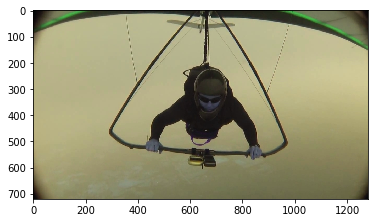

In [14]:
img_data = cv2.imread(hands_img_data[0])
plt.imshow(img_data)
plt.show()

In [ ]:
해당 셀은 손 부분만 크롭하여 이미지로 저장하는 셀. 
for index in range(len(hands_img_data)):
    img_data = cv2.imread(hands_img_data[index])
    x_max = 0
    y_max = 0
    x_min = 9999
    y_min = 9999
    for i in range(len(_tmp[index])):
        if(x_max < _tmp[index]["%d"%i][0]):
            x_max = _tmp[index]["%d"%i][0]
        if(y_max < _tmp[index]["%d"%i][1]):
            y_max = _tmp[index]["%d"%i][1]
        if(x_min > _tmp[index]["%d"%i][0]):
            x_min = _tmp[index]["%d"%i][0]
        if(y_min > _tmp[index]["%d"%i][1]):
            y_min = _tmp[index]["%d"%i][1]
    x_width = x_max-x_min
    y_width = y_max-y_min

    length = x_width if x_width > y_width else y_width

    length
    x_center = ((x_max + x_min) // 2)
    y_center = ((y_max + y_min) // 2)
    print(x_center, y_center)
    crop_x_min = x_center - int(1.1 * length)
    crop_x_max = x_center + int(1.1 * length)
    crop_y_min = y_center - int(1.1 * length)
    crop_y_max = y_center + int(1.1 * length)
    if(crop_x_min < 0):
        crop_x_min = 0
    if(crop_x_max >= np.shape(img_data)[1]):
        crop_x_max = np.shape(img_data)[1]
    if(crop_y_min < 0):
        crop_y_min = 0
    if(crop_y_max >= np.shape(img_data)[0]):
        crop_y_max = np.shape(img_data)[0]
    _map = np.zeros((crop_y_max - crop_y_min, crop_x_max - crop_x_min, 3), dtype=np.int16)
    
    for i in range(crop_x_max-crop_x_min):
        for j in range(crop_y_max-crop_y_min):
            #try:
            _map[j][i] = img_data[crop_y_min + j][crop_x_min + i]
    _map = np.transpose(_map, [1, 0, 2])
    _map = _map[:, :, [2, 0, 1]]
    f_name_index = hands_img_data[index].index("train/")+6
    f_name = hands_img_data[index][f_name_index : ]
    _path = "./dataset/Hands/hand_labels/Cropped_Image/" + f_name
    cv2.imwrite(_path,_map[:, :, [2, 1, 0]])

In [18]:
#해당 부분은 윗 셀에서 저장한 crop된 셀이 옆으로 저장되어서 다시 transpose하고, 색 체계도 바꾸는 셀
file_list = os.listdir("./dataset/Hands/hand_labels/Cropped_Image/")
tmp = []
for i in range(len(file_list)):
    tmp.append("./dataset/Hands/hand_labels/Cropped_Image/" + file_list[i])
#file_list = tmp
for i in range(len(tmp)):
    #print(tmp[i])
    img_data = cv2.imread(tmp[i])
    #print(np.shape(img_data))
    #plt.imshow(img_data)
    #plt.show()
    img_data = np.transpose(img_data, [1, 0, 2])
    img_data = cv2.resize(img_data, (356, 356))
    f_name_index = tmp[i].index("Image/")+6
    f_name = tmp[i][f_name_index : ]
    _path = "./dataset/Hands/hand_labels/Cropped_Resized_Image/" + f_name
    cv2.imwrite(_path, img_data[:, :, :])
    #plt.imshow(img_data[:, :, [2, 1, 0]])
    #plt.show()

In [23]:
_tmp[0]

{'0': [847, 522],
 '1': [837, 525],
 '2': [828, 528],
 '3': [813, 548],
 '4': [817, 562],
 '5': [838, 524],
 '6': [836, 552],
 '7': [837, 560],
 '8': [840, 570],
 '9': [853, 526],
 '10': [848, 551],
 '11': [846, 561],
 '12': [844, 569],
 '13': [862, 530],
 '14': [860, 549],
 '15': [857, 556],
 '16': [853, 563],
 '17': [870, 534],
 '18': [869, 552],
 '19': [865, 557],
 '20': [862, 561]}

In [55]:
for index in range(len(hands_img_data)):
    #print(hands_img_data[0])
    img_data_ = cv2.imread(hands_img_data[index])
    #print(np.shape(img_data_))
    x_max = 0
    y_max = 0
    x_min = 9999
    y_min = 9999
    for i in range(len(buffer)):
        if(x_max < _tmp[index]["%d"%i][0]):
            x_max = _tmp[index]["%d"%i][0]
        if(y_max < _tmp[index]["%d"%i][1]):
            y_max = _tmp[index]["%d"%i][1]
        if(x_min > _tmp[index]["%d"%i][0]):
            x_min = _tmp[index]["%d"%i][0]
        if(y_min > _tmp[index]["%d"%i][1]):
            y_min = _tmp[index]["%d"%i][1]
    x_width = x_max-x_min
    y_width = y_max-y_min

    length = x_width if x_width > y_width else y_width

    length
    x_center = ((x_max + x_min) // 2)
    y_center = ((y_max + y_min) // 2)
    #print(x_center, y_center)
    crop_x_min = x_center - int(1.1 * length)
    crop_x_max = x_center + int(1.1 * length)
    crop_y_min = y_center - int(1.1 * length)
    crop_y_max = y_center + int(1.1 * length)

    size = length * 2.2

    for i in range(len(buffer)):
        _tmp[index]["%d"%i][0] = _tmp[index]["%d"%i][0] - crop_x_min
        _tmp[index]["%d"%i][1] = _tmp[index]["%d"%i][1] - crop_y_min

    for i in range(len(buffer)):
        _tmp[index]["%d"%i][0] = int((_tmp[index]["%d"%i][0] / size) * 44)
        _tmp[index]["%d"%i][1] = int((_tmp[index]["%d"%i][1] / size) * 44)
    _tmp[index]

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(720, 1280, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(720, 1280, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(480, 654, 3)
(480, 654, 3)
(720, 1280, 3)
(1080, 1920, 3)
(720, 1280, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(720, 1280, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3)
(1080, 1920, 3

In [60]:
#np.save("./dataset/Hands/hand_labels/Annotation/cropped_resized_hands_joint_data.npy", _tmp)

In [6]:
#_hands_img_data[0]

'000015774_01_l.jpg'

In [7]:
#path_data = []
#for i in range(len(_hands_img_data)):
#    path_data.append("./dataset/Hands/hand_labels/Cropped_Resized_Image/" + _hands_img_data[i])

In [10]:
#np.save("./dataset/Hands/hand_labels/Annotation/cropped_resized_hands_img_list.npy", path_data)

In [13]:
#np.save('./dataset/Hands/hand_labels/Annotation/hands_joint_data.npy', _tmp) # x_save.npy

In [8]:
#img_list = []
#for i in range(len(hands_img_data)):
#    img_list.append("./dataset/Hands/hand_labels/Resized_Image/" + _hands_img_data[i])
#np.save('./dataset/Hands/hand_labels/Annotation/resized_hands_img_list.npy', img_list) # x_save.npy

In [14]:
#joint_data = np.load('./dataset/Hands/hand_labels/Annotation/hands_joint_data.npy')

In [15]:
#img_list = np.load('./dataset/Hands/hand_labels/Annotation/resized_hands_img_list.npy')

In [16]:
#len(joint_data[-5])

21

In [45]:
def make_heatmap(batch_anno_data, width = 44, height = 44, num_of_maps = 22):
    batch_size = len(batch_anno_data)
    width = 44
    height = 44
    num_of_maps = 22
    output = np.zeros((batch_size, width, height, num_of_maps))
    for index, joint_data in enumerate(batch_anno_data):

        heatmap = np.zeros((width, height, num_of_maps), np.int16)#batch 일단 뺌

        for joints in joint_data:
            #print(joints)
            buffer = list(joints.items())
            key_buffer = joints.keys()

            for i in range(len(buffer)):
                buffer[i] = list(buffer[i])
                buffer[i][0] = int(buffer[i][0])
            bubble_sort(buffer)

            idx = 0
            for j in range(22):

                #print(j)
                if('%d' %j in key_buffer):
                    center_x = buffer[idx][1][0]
                    center_y = buffer[idx][1][1]
                    #joint = buffer[idx][1]
                    joint = [center_y, center_x]
                    idx = idx + 1
                    _put_heatmap_on_plane(heatmap, plane_idx = j, joint = joint, sigma = 3, height = height, width = width, stride = 1)
                else:
                    pass
            idx = 0
        heatmap[:, :, -1] = np.clip(1.0 - np.amax(heatmap, axis=2), 0.0, 1.0)
        output[index] = heatmap
    return output

def make_paf_field(batch_joint_data, width = 44, height = 44, num_of_maps = 22):
    batch_size = len(batch_joint_data)
    output1 = np.zeros((batch_size, width, height, num_of_maps*2))
    output2 = np.zeros((batch_size, width, height, num_of_maps))
    for index, joint_data in enumerate(batch_joint_data):
        joint_pairs = list(zip(
            [0, 1, 2, 3, 0, 5, 6, 7, 0, 10, 11,  0, 13, 14, 15,  0, 17, 18, 19],
            [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]))
        #make vector map
        width = 44
        height = 44
        num_of_maps = 22
        vectormap = np.zeros((width, height, num_of_maps*2), dtype=np.float32)#batch 일단 뺌
        countmap = np.zeros((width, height, num_of_maps), np.int16)#batch 일단 뺌

        for joints in joint_data:
            key = (joints.keys())
            for plane_idx, (j_idx1, j_idx2) in enumerate(joint_pairs):
                if(('%d' %j_idx1 in key) and ('%d' %j_idx2 in key)):

                    center_from = joints['%d'%j_idx1]
                    center_to = joints['%d'%j_idx2]

                    if not center_from or not center_to:
                        continue
                    _put_paf_on_plane(vectormap=vectormap, countmap=countmap, plane_idx=plane_idx, center_from=center_from, center_to=center_to, threshold=1, height=88, width=88, stride = 1)

        nonzeros = np.nonzero(countmap)


        for x, y, p in zip(nonzeros[0], nonzeros[1], nonzeros[2]):
            if countmap[x][y][p] <= 0:
                continue
            vectormap[x][y][p*2+0] /= countmap[x][y][p]
            vectormap[x][y][p*2+1] /= countmap[x][y][p]

        output1[index] = vectormap.astype(np.float32)
        output2[index] = countmap
    return output1, output2 #output1 -> vectormap, output2 -> countmap

def _put_heatmap_on_plane(heatmap, plane_idx, joint, sigma, height, width, stride):
    start = stride / 2.0 - 0.5

    center_x, center_y = joint

    for g_y in range(height):
        for g_x in range(width):
            x = start + g_x * stride
            y = start + g_y * stride
            d2 = (x-center_x) * (x-center_x) + (y-center_y) * (y-center_y)
            exponent = d2 / 2.0 / sigma / sigma
            if exponent > 4.6052:
                continue

            heatmap[g_y, g_x, plane_idx] += math.exp(-exponent)
            if heatmap[g_y, g_x, plane_idx] > 1.0:
                heatmap[g_y, g_x, plane_idx] = 1.0
                
                
def _put_paf_on_plane(vectormap, countmap, plane_idx, center_from, center_to, threshold, height, width, stride):
    center_from = (center_from[0] // stride, center_from[1] // stride)
    center_to = (center_to[0] // stride, center_to[1] // stride)

    vec_x = center_to[0] - center_from[0]
    vec_y = center_to[1] - center_from[1]

    min_x = max(0, int(min(center_from[0], center_to[0]) - threshold))
    min_y = max(0, int(min(center_from[1], center_to[1]) - threshold))

    max_x = min(width, int(max(center_from[0], center_to[0]) + threshold))
    max_y = min(height, int(max(center_from[1], center_to[1]) + threshold))

    norm = math.sqrt(vec_x ** 2 + vec_y ** 2)
    if norm < 1e-8: #1e-8 이하는 0으로 인식되서 0으로 나눌수 없다는 에러 발생. 따라서 return처리 해줌
        return

    vec_x /= norm
    vec_y /= norm
    
    for x in range(min_x, max_x):
        for y in range(min_y, max_y):
            bec_x = x - center_from[0]
            bec_y = y - center_from[1]
            dist = abs(bec_x * vec_y - bec_y * vec_x)

            if dist > threshold:
                continue

            countmap[x][y][plane_idx] = countmap[x][y][plane_idx] + 1

            vectormap[x][y][plane_idx*2+0] = vec_x
            vectormap[x][y][plane_idx*2+1] = vec_y
def bubble_sort(L):
    for i in range(len(L)-1):
        for j in range(len(L)-1):
            if L[j] > L[j+1]:
                temp = L[j+1]
                L[j+1] = L[j]
                L[j] = temp      

In [23]:
#plt.imshow(img_data[:,:,[2,1,0]])
#plt.imshow(tmp[:,:], alpha=.7)#alpha -> 이미지 얼마나 선명한가. heatmap_avg[:,:,0] -> 1:r_knee
#fig = matplotlib.pyplot.gcf()
#cax = matplotlib.pyplot.gca()
#fig.set_size_inches(20, 20)
#fig.subplots_adjust(right=0.93)
#cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
#_ = fig.colorbar(oriImg, cax=cbar_ax)

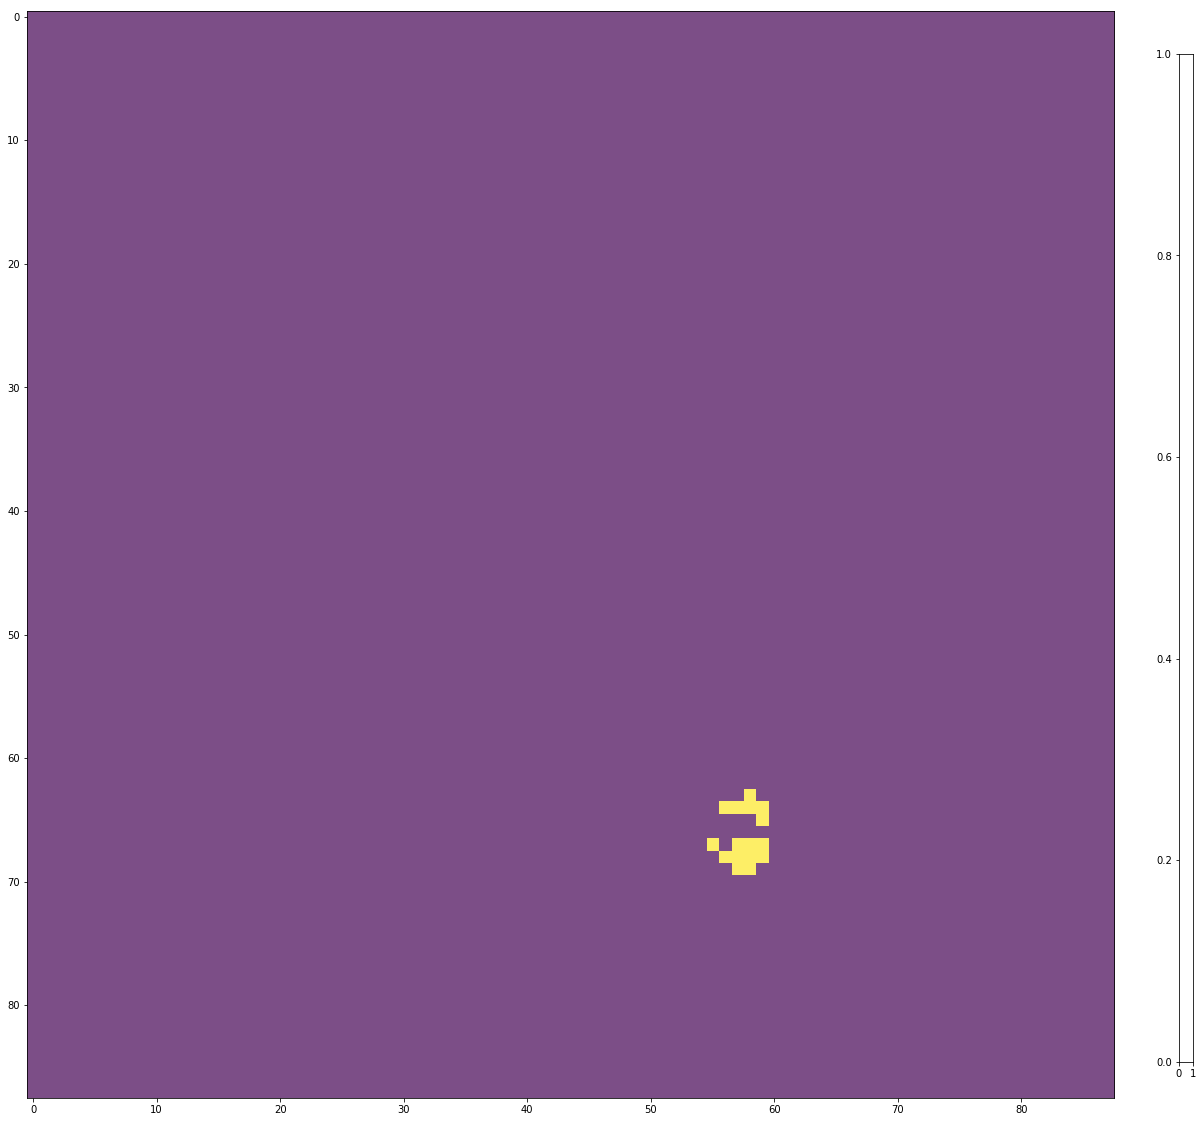

In [24]:
#plt.imshow(img_data[:,:,[2,1,0]])
plt.imshow(tmp[:,:], alpha=.7)#alpha -> 이미지 얼마나 선명한가. heatmap_avg[:,:,0] -> 1:r_knee
fig = matplotlib.pyplot.gcf()
cax = matplotlib.pyplot.gca()
fig.set_size_inches(20, 20)
fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
#_ = fig.colorbar(oriImg, cax=cbar_ax)

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

edges = [[0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20]]

outpath = './output_viz/'
if not os.path.isdir(outpath):
    os.makedirs(outpath)

# Input data paths
paths = ['synth1/', 'synth2/', 'synth3', 'synth4']
paths = ['manual_test/', 'manual_train/']
inpath = paths[0]

files = sorted([f for f in os.listdir(inpath) if f.endswith('.json')])
for f in files[-2:-1]:
    with open(inpath+f, 'r') as fid:
        dat = json.load(fid)

    # Each file contains 1 hand annotation, with 21 points in
    # 'hand_pts' of size 21x3, following this scheme:
    # https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/output.md#hand-output-format
    # The 3rd column is 1 if valid:
    pts = np.array(dat['hand_pts'])
    invalid = pts[:,2]!=1
    
    # Left hands are marked, but otherwise follow the same point order
    is_left = dat['is_left']

    dat['hand_pts'] = pts.tolist()

    # Plot annotations
    plt.clf()
    im = plt.imread(inpath+f[0:-5]+'.jpg')
    plt.imshow(im)
    for p in range(pts.shape[0]):
        if pts[p,2]!=0:
            plt.plot(pts[p,0], pts[p,1],'r.')
            plt.text(pts[p,0], pts[p,1], '{0}'.format(p))
    for ie, e in enumerate(edges):
        if np.all(pts[e,2]!=0):
            rgb = matplotlib.colors.hsv_to_rgb([ie/float(len(edges)),1.0,1.0])
            plt.plot(pts[e,0],pts[e,1],color=rgb)
    if is_left:
        plt.text(10, 30, 'left', color='r', fontsize=24)

    # These fields are only present in manual annotations.
    # head_box (or head_size) is used to normalize size wrt. MPII head size for testing
    if 'head_box' in dat:
        head_box = np.array(dat['head_box'])
        head_size = dat['head_size']
        bpts = np.array(dat['mpii_body_pts'])

        for p in range(bpts.shape[0]):
            plt.plot(bpts[p,0], bpts[p,1],'g.',ms=10)
            plt.text(bpts[p,0], bpts[p,1], '{0}'.format(p), color='w')
        plt.plot(head_box[0,0], head_box[0,1],'b*',ms=10)
        plt.plot(head_box[1,0], head_box[1,1],'b*',ms=10)
        plt.plot(head_box[0:2,0], head_box[[0,0],1],'b')
        plt.plot(head_box[0:2,0], head_box[[1,1],1],'b')
        plt.plot(head_box[[0,0],0], head_box[0:2,1],'b')
        plt.plot(head_box[[1,1],0], head_box[0:2,1],'b')

    plt.axis('off')
    plt.savefig(outpath+f[0:-5]+'.jpg', bbox_inches='tight')